In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sys
import networkx as nx
from matplotlib import pyplot as plt
sys.path.append("../src/models/")
from cluster_graphs import ClusterGraphs
sys.path.append("../src/features/")
from graph_embed import GraphEmbed

In [113]:
embeddings = pd.read_pickle("../data/processed/graph_data.pkl")
all_networks = pd.read_csv("../data/raw/all_networks.csv")

In [114]:
embeddings

,canonical_url,date_published,domain,id,site_type,title,num_nodes,num_edges,num_strongly_connected,num_weakly_connected,average_clustering_coef,graph_embedding
0,https://www.albawaba.com/ar/%D8%AA%D8%B1%D9%81...,2021-08-21T18:00:28.674Z,albawaba.com,2580216,claim,هيفاء وهبي تلتقي الجمهور المصري بهذا الموعد | ...,17,16,17,1,0.0,"[0.09700142592191696, -0.09246787428855896, 0...."
1,https://www.albawaba.com/ar/%D8%A5%D8%AE%D8%AA...,2021-08-31T17:21:36.083Z,albawaba.com,2598631,claim,إلقاء القبض على مغتصب طفلتي يتصدر التريند.. وف...,6,5,6,1,0.0,"[0.10292380303144455, -0.10183560103178024, 0...."
2,https://www.albawaba.com/ar/%D8%AA%D8%B1%D9%81...,2021-10-04T20:12:21.087Z,albawaba.com,2638743,claim,شمس الكويتية في موقف محرج بعد فضح ايبودا لها.....,6,5,6,2,0.0,"[0.10610489547252655, -0.10431428998708725, 0...."
3,https://www.albawaba.com/amp/node/internet-has...,2021-08-18T12:16:03.555Z,albawaba.com,2573814,claim,The Internet Has a Serious Question: Is This M...,18,16,18,2,0.0,"[0.10793858021497726, -0.11685159802436829, 0...."
4,https://www.americanthinker.com/blog/2021/08/t...,2021-08-24T08:00:19.978Z,americanthinker.com,2584626,claim,There are lots of reasons to question the FDA’...,13,10,13,3,0.0,"[0.09240275621414185, -0.0997336208820343, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
755,https://www.zerohedge.com/markets/wall-street-...,2021-08-27T15:33:39.887Z,zerohedge.com,2591357,claim,Wall Street Reacts To Powell's Dovish Nothingb...,14,14,13,1,0.0,"[0.06890391558408737, -0.07343551516532898, 0...."
756,https://www.zerohedge.com/covid-19/judge-slaps...,2021-08-27T16:42:23.719Z,zerohedge.com,2591471,claim,Judge Slaps Down DeSantis Order Banning Mask M...,18,17,18,2,0.0,"[0.07844255864620209, -0.0954652801156044, 0.0..."
757,https://www.zerohedge.com/geopolitical/russia-...,2021-08-28T12:11:28.999Z,zerohedge.com,2592919,claim,"Russia, Belarus Plan Massive Anti-NATO Militar...",25,22,25,3,0.0,"[0.0774259865283966, -0.08739064633846283, 0.0..."
758,https://www.zerohedge.com/covid-19/japan-withd...,2021-08-27T14:37:19.767Z,zerohedge.com,2591270,claim,Japan Suspects Contaminant In Moderna Vaccines...,52,48,52,4,0.0,"[0.05479119345545769, -0.06696473807096481, 0...."


In [93]:
emb_arr = np.array(embeddings.graph_embedding.to_list())
cluster = ClusterGraphs(emb_arr)

In [4]:
num_clusters, inertias = cluster.choose_clust_num_k_means()
num_clusters

4

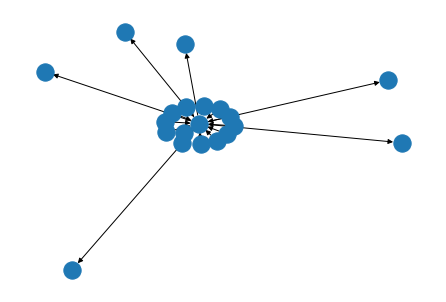

In [109]:
nx.draw(g)

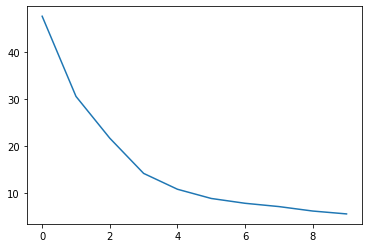

In [5]:
plt.plot(inertias)

In [6]:
labels = cluster.get_cluster_labels_k_means(n_clusters=3)

In [7]:
labels.value_counts()

0    514
2    240
1      6
dtype: int64

## Exploring Smallest Cluster

In [36]:
graphs_1 = labels.loc[labels==1].index
graphs_1

Int64Index([73, 199, 209, 334, 336, 337], dtype='int64')

In [59]:
ge = GraphEmbed("graph2vec")
ge.build_graphs(all_networks, 5)
graphs = ge.get_graphs()

In [61]:
test_g = graphs[73]

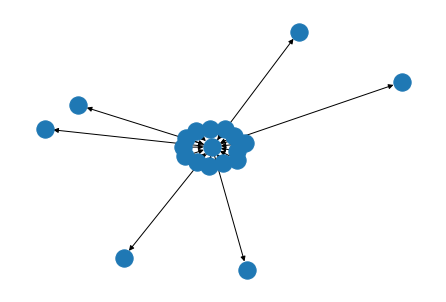

In [10]:
nx.draw(graphs[73])

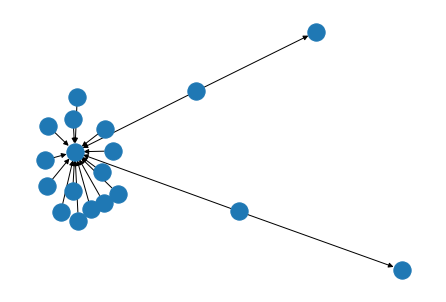

In [11]:
nx.draw(graphs[199])

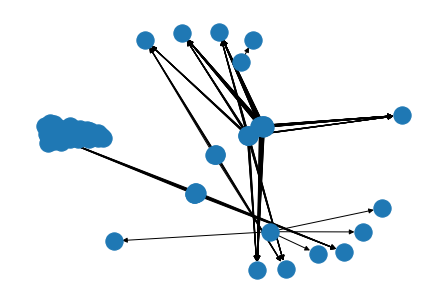

In [12]:
nx.draw(graphs[209])

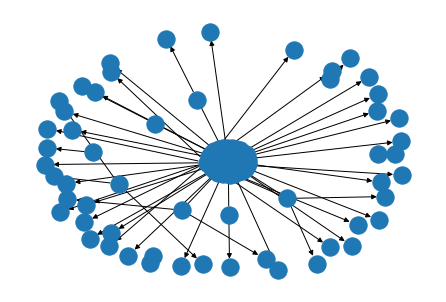

In [13]:
nx.draw(graphs[334])

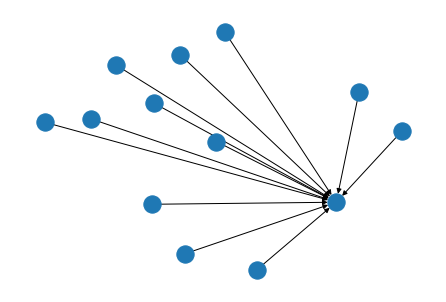

In [14]:
nx.draw(graphs[336])

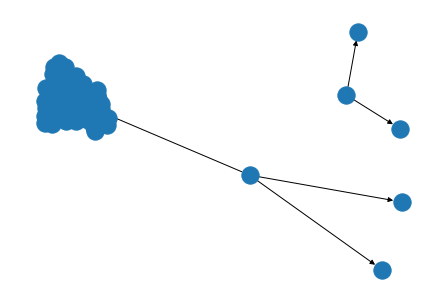

In [15]:
nx.draw(graphs[337])

In [40]:
ids = embeddings.iloc[graphs_1].article_id

In [42]:
info = all_networks.loc[all_networks.id.isin(ids)]

In [44]:
info.title.unique()

array(['Episode 6: Israel and South and South Africa: Testing Grounds For The Great Reset - Audio',
       'WATCH: President Trump Speaks To The American People',
       'Short video contest launched to show the real Xinjiang',
       'Make a Change for the Better—Try Our 3-Week Vegan Challenge',
       '15 ‘SPUDtacular’ Vegan Potato Recipes | PETA',
       'Tell Brian Franzen to Stop Forcing Animals to Perform in Circuses! | PETA'],
      dtype=object)

In [45]:
info.domain.unique()

array(['childrenshealthdefense.org', 'gellerreport.com', 'globaltimes.cn',
       'peta.org'], dtype=object)

## Exploring mean graph from each cluster

In [20]:
clust_0 = cluster.get_mean_vec_cluster(0)
clust_1 = cluster.get_mean_vec_cluster(1)
clust_2 = cluster.get_mean_vec_cluster(2)

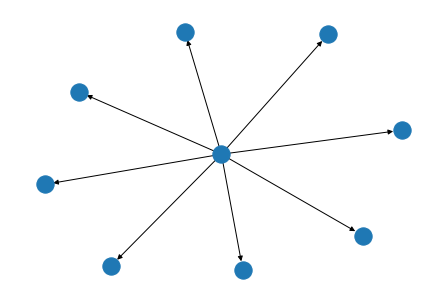

In [22]:
nx.draw(graphs[clust_0])

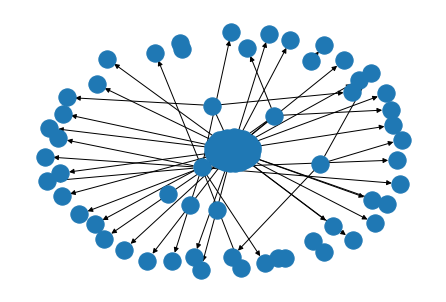

In [24]:
nx.draw(graphs[clust_1])

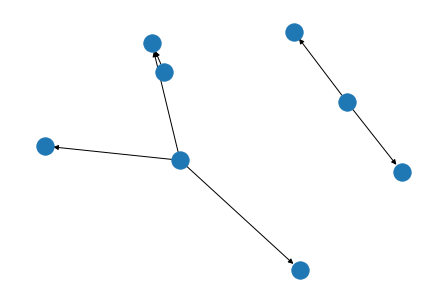

In [25]:
nx.draw(graphs[clust_2])

## Exploring Article Features from each cluster

In [29]:
id = embeddings.iloc[334].article_id

In [33]:
all_networks.loc[all_networks.id == id].iloc[0].title

'Make a Change for the Better—Try Our 3-Week Vegan Challenge'

In [34]:
all_networks.loc[all_networks.id == id].iloc[0].domain

'peta.org'